In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection  import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier

import curves
import utils

In [2]:
ds = datasets.load_breast_cancer()
X = ds.data
y = ds.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [3]:
# model = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=0)
model = KNeighborsClassifier(n_neighbors=20)

best_classifier = None
best_accuracy = None

kf = KFold(n_splits=5)
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_split_train = X_train[train_index]
    y_split_train = y_train[train_index]
    X_split_valid = X_train[test_index]
    y_split_valid = y_train[test_index]
    classifier = model.fit(X_split_train, y_split_train)
    pred = classifier.predict(X_split_valid)
    accu = f1_score(y_split_valid, pred)
    print(f'Fold {i + 1} : the f1 of validation data is {accu}')
    
    if (best_accuracy is not None) and best_accuracy < accu:
        best_accuracy = accu
        best_classifier = classifier
    elif best_accuracy is None:
        best_accuracy = accu

Fold 1 : the f1 of validation data is 0.970873786407767
Fold 2 : the f1 of validation data is 0.9565217391304348
Fold 3 : the f1 of validation data is 0.9047619047619048
Fold 4 : the f1 of validation data is 0.9411764705882353
Fold 5 : the f1 of validation data is 0.9245283018867925


In [4]:
print(f"Best f1: {best_accuracy}")

Best f1: 0.970873786407767


In [24]:
# 1 - true, 0 - false
# first column probs for 0, second for 1!
predict_proba = classifier.predict_proba(X_test)
probs_0 = predict_proba[:, 0]
probs_1 = predict_proba[:, 1]

probs_fact_class = np.column_stack((probs_1, y_test))
# sort probs with fact classe and reverse sorted array
probs_fact_class = probs_fact_class[probs_fact_class[:, 0].argsort()[::-1]]

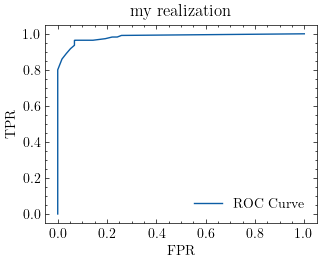

In [25]:
fprs, tprs, thresholds = curves.roc_curve(y_test, probs_1)
utils.plot_curve(fprs, tprs, title="my realization", label='ROC Curve', xlabel='FPR', ylabel='TPR')

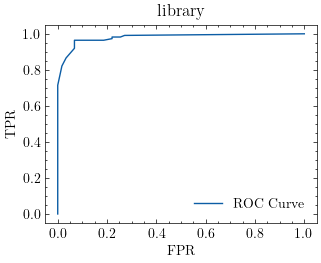

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, probs_1)
utils.plot_curve(fpr, tpr, title="library", label='ROC Curve', xlabel='FPR', ylabel='TPR')

In [16]:
AUC = auc(fprs, tprs)
print("my auc", AUC)

my auc 0.5547954689995163


In [17]:
lib_AUC = auc(fpr, tpr)
print("lib auc", lib_AUC)

lib auc 0.5546307506053268


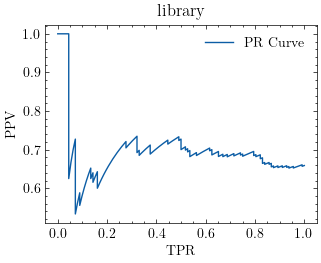

0.6928122239974285

In [18]:
precision, recall, thresholds = precision_recall_curve(y_test, probs_1)
utils.plot_curve(recall, precision, title="library")
AUC = auc(recall, precision)
AUC

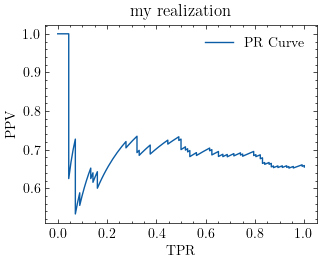

0.6928122239974285

In [19]:
precision, recall, thresholds = curves.precision_recall_curve(y_test, probs_1)
utils.plot_curve(recall, precision, title="my realization")
AUC = auc(recall, precision)
AUC

# есть PPV, какой он будет, если порог выставить = 0

In [ ]:
# формально по 1-ой пару вопросов